<a href="https://colab.research.google.com/github/hasnainshah0018/Hasnain-Shah/blob/main/DS_Project_Fall2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project

Title:

---

---




Group Members:

---







M. Hasnain Shah (SP23-MSCS-0018)

---


Javvad Ali (SP23-MSCS-0020)

# Table of Content

>[Project](#scrollTo=7QYPVkomrTsF)

>[Table of Content](#scrollTo=XFpwfqjvsUfk)

>[Introduction](#scrollTo=TndBpd-fiZWR)

>[Dataset](#scrollTo=lCR37hnpiqVB)

>[Importing Libraries & Dataset](#scrollTo=enpQH8oaegKi)

>[Exploring Dataset](#scrollTo=SKr1w1VQe34V)

>[Exploring Data Correlation](#scrollTo=I4INAQKneE5w)

>[Cleaning, Filtering And Modifying Data](#scrollTo=EwuHm9SWfE8a)

>[Model Training](#scrollTo=a7GcwMyMg1Ec)

>[Conclusion](#scrollTo=C0_Nclkqh-Iy)

>[Future Work](#scrollTo=18U5gOoUiOtx)



# Introduction

Phishing attacks, a form of cybercrime, are increasingly becoming a significant threat to internet users worldwide. These attacks involve fraudulent attempts to obtain sensitive information, such as usernames, passwords, and financial details, by impersonating legitimate websites or services. Phishing websites often disguise themselves as trustworthy sites, making it difficult for users to detect them. As a result, effective detection of phishing websites is crucial to safeguarding personal and organizational data.

In this analysis, we aim to leverage Data Science and Machine Learning (ML) techniques to identify phishing websites based on various characteristics of their URLs and associated features. The goal is to develop an automated system that can accurately classify websites as either phishing or legitimate (non-phishing) based on the data provided.

The analysis is performed on a phishing dataset that contains information on various website attributes, with each instance labeled as either "phishing" (0) or "non-phishing" (1). We will use machine learning algorithms to build predictive models capable of distinguishing between phishing and legitimate URLs. These models will be evaluated using performance metrics such as accuracy, precision, recall, and F1-score.


The primary steps in this analysis include:
  
**Data Preprocessing:** Handling missing values, encoding categorical variables, and transforming features to make the data suitable for machine learning.

**Exploratory Data Analysis (EDA):** Understanding the distribution of the target variable and identifying key patterns and trends in the dataset.

**Model Building and Evaluation:** Implementing and evaluating different machine learning models, including Logistic Regression and Random Forest, to determine the most effective approach for phishing detection.

**Performance Metrics:** Using accuracy, precision, recall, and F1-score to assess and compare the performance of the models.

**Model Interpretation:** Understanding which features are most important in identifying phishing websites.

By the end of this project, we aim to provide a robust machine learning model that can detect phishing websites with high accuracy and reliability, offering a potential tool for enhancing online security and preventing data breaches caused by phishing attacks.

# Dataset

PhiUSIIL Phishing URL Dataset is a substantial dataset comprising 134,850 legitimate and 100,945 phishing URLs. Label 1 corresponds to a legitimate URL, label 0 to a phishing URL

# Importing Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import sklearn.metrics as metrics
from google.colab import files

In [9]:
df = pd.read_csv('/content/sample_data/PhiUSIIL_Phishing_URL_Dataset.csv')

# Exploring Dataset

In [10]:
df.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [11]:
df.shape

(235795, 56)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

In [13]:
df.describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,...,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,34.573095,21.470396,0.002706,78.430778,0.845508,0.260423,0.055747,2.764456,1.164758,0.002057,...,0.237007,0.023474,0.486775,26.075689,6.333111,10.522305,65.071113,2.377629,49.262516,0.571895
std,41.314153,9.150793,0.051946,28.976055,0.216632,0.251628,0.010587,0.599739,0.600969,0.045306,...,0.425247,0.151403,0.499826,79.411815,74.866296,22.312192,176.687539,17.641097,161.027430,0.494805
min,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001083,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,57.024793,0.680000,0.005977,0.050747,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.057970,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,8.000000,2.000000,6.000000,12.000000,0.000000,10.000000,1.000000
75%,34.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062875,3.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,29.000000,8.000000,15.000000,88.000000,1.000000,57.000000,1.000000
max,6097.000000,110.000000,1.000000,100.000000,1.000000,0.522907,0.090824,13.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,27516.000000,1.000000


In [14]:
# Get the counts of phishing and legitimate URLs
url_counts = df['label'].value_counts().sort_index()
print(url_counts)

label
0    100945
1    134850
Name: count, dtype: int64


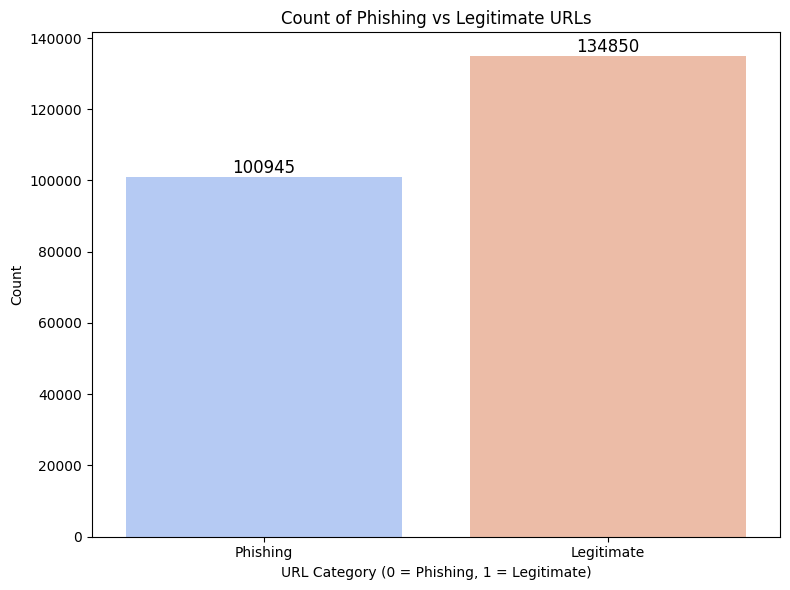

In [17]:
# Plotting the bar chart
plt.figure(figsize=(8, 6))

# Seaborn barplot to plot the count of phishing vs non-phishing URLs
ax = sns.barplot(x=url_counts.index, y=url_counts.values, palette='coolwarm')

# Customize the plot
plt.title('Count of Phishing vs Legitimate URLs')
plt.xlabel('URL Category (0 = Phishing, 1 = Legitimate)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Phishing', 'Legitimate'], rotation=0)

# Add count labels on top of each bar
for i, value in enumerate(url_counts.values):
    ax.text(i, value + 0.1, f'{int(value)}', ha='center', va='bottom', fontsize=12)

# Tight layout to ensure labels fit within the plot
plt.tight_layout()

# Show the plot
plt.show()

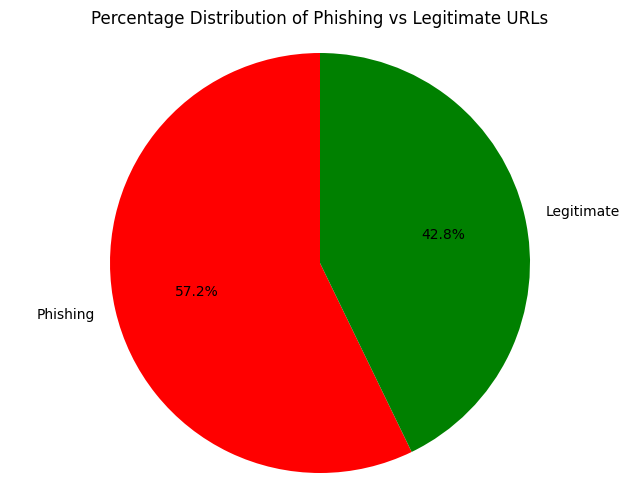

In [18]:
url_perc = df['label'].value_counts(normalize=True) * 100  # Normalize to get percentages

# Create labels for the pie chart
labels = ['Phishing', 'Legitimate']

# Plotting the percentage distribution in a pie chart
plt.figure(figsize=(8, 6))
plt.pie(url_perc, labels=labels, autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
plt.title('Percentage Distribution of Phishing vs Legitimate URLs')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle
plt.show()

# Exploring Data Correlation

In [20]:
df_numeric = df.select_dtypes(include=['number'])

corr_matrix = df_numeric.corr()
corr_matrix.style.background_gradient(cmap='RdYlGn')

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,LetterRatioInURL,NoOfDegitsInURL,DegitRatioInURL,NoOfEqualsInURL,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfOtherSpecialCharsInURL,SpacialCharRatioInURL,IsHTTPS,LineOfCode,LargestLineLength,HasTitle,DomainTitleMatchScore,URLTitleMatchScore,HasFavicon,Robots,IsResponsive,NoOfURLRedirect,NoOfSelfRedirect,HasDescription,NoOfPopup,NoOfiFrame,HasExternalFormSubmit,HasSocialNet,HasSubmitButton,HasHiddenFields,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
URLLength,1.000000,0.243091,0.277272,-0.421104,-0.241104,-0.016656,-0.245215,0.033339,0.071058,0.161980,0.459094,0.127472,0.956047,0.312632,0.835809,0.304379,0.685091,0.474901,0.500387,0.782582,0.199112,0.013117,-0.060636,0.045219,-0.075456,-0.215877,-0.193234,-0.094548,-0.073770,-0.082549,0.029975,-0.005168,-0.149104,-0.010952,-0.044875,-0.035443,-0.180909,-0.067420,-0.072551,0.021561,-0.031734,-0.057816,-0.025163,-0.126420,-0.064639,-0.014507,-0.078643,-0.074722,-0.023206,-0.059055,-0.233445
DomainLength,0.243091,1.000000,-0.041398,-0.420694,-0.577425,0.027209,-0.178104,0.152669,0.399157,0.041643,0.011304,0.021627,0.277602,0.547854,0.131709,0.289628,0.020033,0.064477,0.016320,0.272930,0.182803,-0.019218,-0.075171,0.067131,-0.107133,-0.296493,-0.328603,-0.148317,-0.082594,-0.119737,0.019387,-0.046803,-0.202821,-0.012502,-0.051687,-0.038560,-0.216055,-0.111077,-0.111882,0.009409,-0.039944,-0.065895,-0.034773,-0.196860,-0.083458,-0.017596,-0.102216,-0.096712,-0.031673,-0.070099,-0.283152
IsDomainIP,0.277272,-0.041398,1.000000,-0.121439,-0.101307,-0.053220,-0.111769,-0.011125,0.084619,0.001239,0.000354,0.000977,0.244300,-0.002630,0.224703,0.161257,0.288351,0.389523,0.178814,0.285846,0.115484,-0.011741,-0.016211,0.002159,-0.004602,-0.052033,-0.054458,-0.030890,-0.028261,-0.006481,0.023497,-0.010231,-0.021518,-0.002795,-0.009741,-0.007988,-0.046432,-0.011489,-0.011962,-0.008419,-0.015708,-0.013863,-0.005919,-0.022796,-0.016502,-0.004149,-0.023126,-0.018981,-0.006793,-0.015269,-0.060202
URLSimilarityIndex,-0.421104,-0.420694,-0.121439,1.000000,0.572938,0.162042,0.571622,-0.053915,-0.058481,-0.100159,-0.032257,-0.078989,-0.449120,-0.491761,-0.299591,-0.561238,-0.161075,-0.341722,-0.075346,-0.540554,-0.604885,0.346389,0.231147,-0.078496,0.352123,0.604045,0.543969,0.402334,0.313293,0.433413,-0.060840,-0.049634,0.590195,0.041042,0.191208,0.139202,0.673690,0.448227,0.404655,0.061553,0.151290,0.291542,0.087228,0.613620,0.235728,0.057683,0.315679,0.271590,0.091556,0.221960,0.860358
CharContinuationRate,-0.241104,-0.577425,-0.101307,0.572938,1.000000,0.237221,0.349810,0.051438,-0.482314,-0.036231,-0.004371,-0.021257,-0.252761,-0.304448,-0.158497,-0.343880,-0.068517,-0.145347,-0.034872,-0.425542,-0.711020,0.089170,0.133351,-0.068861,0.164529,0.550943,0.568560,0.213020,0.177268,0.206705,-0.031916,0.019089,0.340722,0.021262,0.127151,0.086036,0.380694,0.245257,0.220213,0.075026,0.095809,0.179145,0.059667,0.345566,0.135931,0.027943,0.183900,0.147881,0.049963,0.121745,0.467735
TLDLegitimateProb,-0.016656,0.027209,-0.053220,0.162042,0.237221,1.000000,0.274224,0.386794,-0.250048,-0.016577,0.001207,-0.010993,-0.004864,0.128466,-0.029101,-0.090831,-0.009376,-0.036019,-0.011255,-0.094307,-0.280275,0.043764,0.041658,-0.025272,0.005597,0.298565,0.296253,0.033452,0.058150,0.081560,-0.008145,-0.036884,0.119061,0.005316,0.093219,0.027294,0.097843,0.063004,0.075440,0.070310,0.085441,0.111494,0.038673,0.114394,0.053432,0.008296,0.058475,0.028216,0.015252,0.033182,0.097389
URLCharProb,-0.245215,-0.178104,-0.111769,0.571622,0.349810,0.274224,1.000000,0.069818,-0.081576,-0.056108,-0.029030,-0.044623,-0.214701,0.045577,-0.290734,-0.708875,-0.103363,-0.193290,-0.055230,-0.307038,-0.396982,0.161159,0.124884,-0.058660,0.156942,0.361329,0.331182,0.216097,0.1

In [21]:
correlation_with_target = corr_matrix["label"].drop("label") #extracts the column of correlations between all features and the target variable (label)
print("Correlation with target:\n", correlation_with_target)

Correlation with target:
 URLLength                    -0.233445
DomainLength                 -0.283152
IsDomainIP                   -0.060202
URLSimilarityIndex            0.860358
CharContinuationRate          0.467735
TLDLegitimateProb             0.097389
URLCharProb                   0.469749
TLDLength                    -0.079159
NoOfSubDomain                -0.005955
HasObfuscation               -0.052473
NoOfObfuscatedChar           -0.015315
ObfuscationRatio             -0.041915
NoOfLettersInURL             -0.258090
LetterRatioInURL             -0.367794
NoOfDegitsInURL              -0.177980
DegitRatioInURL              -0.432032
NoOfEqualsInURL              -0.076963
NoOfQMarkInURL               -0.175621
NoOfAmpersandInURL           -0.034622
NoOfOtherSpecialCharsInURL   -0.358891
SpacialCharRatioInURL        -0.533537
IsHTTPS                       0.609132
LineOfCode                    0.272257
LargestLineLength            -0.041111
HasTitle                      0.459725

# Cleaning, Filtering And Modifying Data

In [22]:
# Identify features with low correlation to the target (e.g., abs(correlation) < 0.5)
low_correlation_features = correlation_with_target[correlation_with_target.abs() < 0.5].index.tolist()

#abs() method in Python is used to calculate the absolute value of numbers. In the context of a Pandas Series or DataFrame, it
#computes the absolute value of each element, ensuring all values are non-negative.

print("Low correlation features:", low_correlation_features)

Low correlation features: ['URLLength', 'DomainLength', 'IsDomainIP', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'LineOfCode', 'LargestLineLength', 'HasTitle', 'HasFavicon', 'Robots', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef']


In [23]:
df.drop(['URL', 'FILENAME', 'Domain', 'Title', 'URLLength', 'DomainLength', 'IsDomainIP', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'LineOfCode', 'LargestLineLength', 'HasTitle', 'HasFavicon', 'Robots', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef'], axis = 1, inplace = True)
df

,TLD,URLSimilarityIndex,SpacialCharRatioInURL,IsHTTPS,DomainTitleMatchScore,URLTitleMatchScore,IsResponsive,HasDescription,HasSocialNet,HasSubmitButton,HasHiddenFields,HasCopyrightInfo,label
0,com,100.000000,0.032,1,0.000000,0.000000,1,0,0,1,1,1,1
1,de,100.000000,0.087,1,55.555556,55.555556,0,0,1,1,0,1,1
2,uk,100.000000,0.069,1,46.666667,46.666667,1,1,0,1,1,1,1
3,com,100.000000,0.038,1,0.000000,0.000000,1,0,1,1,1,1,1
4,org,100.000000,0.030,1,100.000000,100.000000,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,com,100.000000,0.034,1,100.000000,100.000000,1,1,1,1,1,1,1
235791,uk,100.000000,0.071,1,0.000000,0.000000,1,1,1,1,1,0,1
235792,be,100.000000,0.033,1,100.000000,100.000000,1,1,1,1,0,1,1
235793,dev,28.157537,0.091,1,0.000000,0.000000,1,0,0,1,1,0,0


In [24]:
print(df.isnull().sum())

TLD                      0
URLSimilarityIndex       0
SpacialCharRatioInURL    0
IsHTTPS                  0
DomainTitleMatchScore    0
URLTitleMatchScore       0
IsResponsive             0
HasDescription           0
HasSocialNet             0
HasSubmitButton          0
HasHiddenFields          0
HasCopyrightInfo         0
label                    0
dtype: int64


<Figure size 1200x700 with 0 Axes>

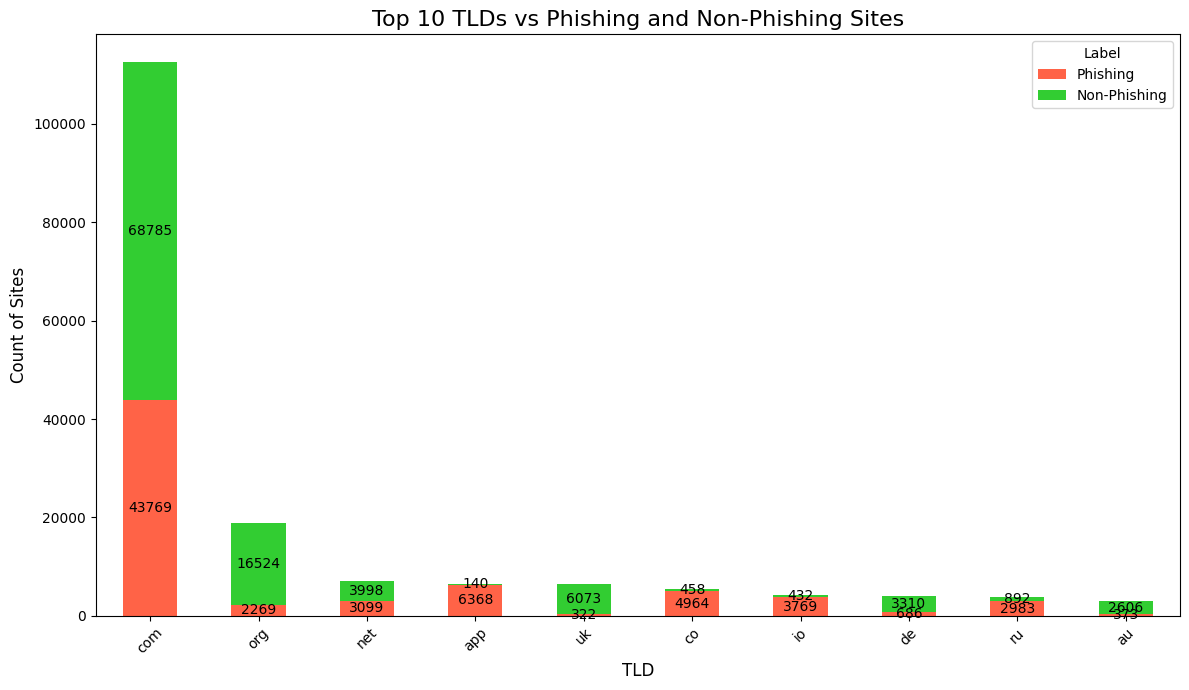

In [25]:
tld_counts = df.groupby(['TLD', 'label']).size().unstack(fill_value=0)
top_10_tlds = tld_counts.sum(axis=1).nlargest(10).index
tld_counts_top_10 = tld_counts.loc[top_10_tlds]

# Plot the data using a stacked bar chart
plt.figure(figsize=(12, 7))
ax = tld_counts_top_10.plot(kind='bar', stacked=True, color=['#ff6347', '#32cd32'], figsize=(12, 7))

# Add text labels to the bars (show total counts)
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    y = p.get_y() + height / 2

    # Display the label (value) inside the bar
    ax.annotate(f'{int(height)}', (x, y), ha='center', va='center', color='black', fontsize=10)

# Customize the plot
plt.title('Top 10 TLDs vs Phishing and Non-Phishing Sites', fontsize=16)
plt.xlabel('TLD', fontsize=12)
plt.ylabel('Count of Sites', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Label', labels=['Phishing', 'Non-Phishing'])
plt.tight_layout()

# Show the plot
plt.show()

In [26]:
X = df.drop('label', axis = 1) #feature
X

,TLD,URLSimilarityIndex,SpacialCharRatioInURL,IsHTTPS,DomainTitleMatchScore,URLTitleMatchScore,IsResponsive,HasDescription,HasSocialNet,HasSubmitButton,HasHiddenFields,HasCopyrightInfo
0,com,100.000000,0.032,1,0.000000,0.000000,1,0,0,1,1,1
1,de,100.000000,0.087,1,55.555556,55.555556,0,0,1,1,0,1
2,uk,100.000000,0.069,1,46.666667,46.666667,1,1,0,1,1,1
3,com,100.000000,0.038,1,0.000000,0.000000,1,0,1,1,1,1
4,org,100.000000,0.030,1,100.000000,100.000000,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
235790,com,100.000000,0.034,1,100.000000,100.000000,1,1,1,1,1,1
235791,uk,100.000000,0.071,1,0.000000,0.000000,1,1,1,1,1,0
235792,be,100.000000,0.033,1,100.000000,100.000000,1,1,1,1,0,1
235793,dev,28.157537,0.091,1,0.000000,0.000000,1,0,0,1,1,0


In [27]:
y = df['label'] #target
y

,label
0,1
1,1
2,1
3,1
4,1
...,...
235790,1
235791,1
235792,1
235793,0


In [28]:
original_tlds = X['TLD'].unique()
original_tlds

array(['com', 'de', 'uk', 'org', 'in', 'ie', 'hu', 'ru', 'gq', 'es', 'jp',
       'guru', 'app', 'io', 'club', 'fr', 'au', 'today', 'cloud', 'br',
       'pt', 'co', 'lt', 'ca', 'xyz', 'sk', 'pl', 'dk', 'dev', 'ga',
       'edu', 'space', 'ws', '123', 'cf', 'rs', 'games', 'nl', 'me',
       'net', 'life', 'ua', 'id', 'mx', 'asia', 'store', 'nz', 'eus',
       'qa', 'fi', 'ch', 'site', 'shop', 'hr', 'cz', 'im', 'ee', 'sg',
       'travel', 'tz', 'top', 'info', 'tokyo', 'at', 'gr', 'cc', 'tv',
       'online', 'lk', 'review', 'us', 'bar', 'link', 'ng', 'cl', 'ar',
       'one', 'ph', 'tr', 'mil', 'se', '94', 'live', 'cn', 'ir', 'it',
       'gd', 'eu', 'win', 'no', 'su', 'gov', 'bg', 'ro', 'kr', 'eg',
       'biz', 'il', 'page', 'pm', 'sh', 'pk', 'my', 'quest', 'be', 'sa',
       'tk', 'vip', 'agency', 'cyou', 'kz', 'uy', 'network', '128', 'ml',
       'hk', 'media', 'az', 'aero', 'news', 'lu', 'is', 'coop', 'art',
       'download', 'si', 'fm', 'bt', 'am', 'finance', 'mn', 'kh', 'ug',
 

In [29]:
label_encoder = LabelEncoder()
X['TLD_numeric'] = label_encoder.fit_transform(X['TLD'])
X

,TLD,URLSimilarityIndex,SpacialCharRatioInURL,IsHTTPS,DomainTitleMatchScore,URLTitleMatchScore,IsResponsive,HasDescription,HasSocialNet,HasSubmitButton,HasHiddenFields,HasCopyrightInfo,TLD_numeric
0,com,100.000000,0.032,1,0.000000,0.000000,1,0,0,1,1,1,231
1,de,100.000000,0.087,1,55.555556,55.555556,0,0,1,1,0,1,254
2,uk,100.000000,0.069,1,46.666667,46.666667,1,1,0,1,1,1,647
3,com,100.000000,0.038,1,0.000000,0.000000,1,0,1,1,1,1,231
4,org,100.000000,0.030,1,100.000000,100.000000,1,1,1,1,1,1,503
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,com,100.000000,0.034,1,100.000000,100.000000,1,1,1,1,1,1,231
235791,uk,100.000000,0.071,1,0.000000,0.000000,1,1,1,1,1,0,647
235792,be,100.000000,0.033,1,100.000000,100.000000,1,1,1,1,0,1,157
235793,dev,28.157537,0.091,1,0.000000,0.000000,1,0,0,1,1,0,258


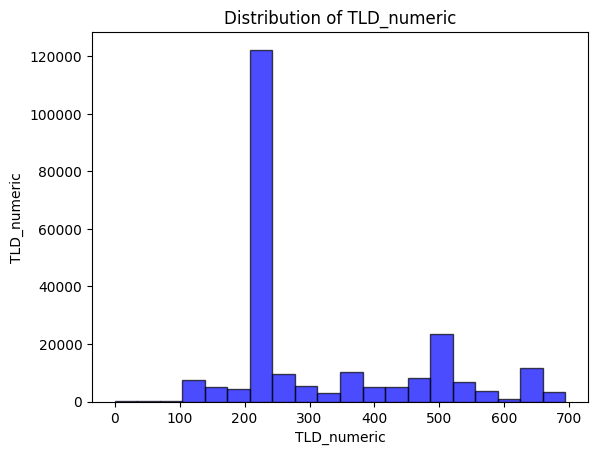

In [30]:
# Visualizing the distribution of 'TLD_numeric'
plt.hist(X['TLD_numeric'], bins=20, color='blue', edgecolor='k', alpha=0.7)
plt.title('Distribution of TLD_numeric')
plt.xlabel('TLD_numeric')
plt.ylabel('TLD_numeric')
plt.show()

#The graph highlights that TLDs within the numeric range 200–250, corresponding to common domains
#such as cars, casa, cash, etc. dominate the dataset.

In [31]:
label_encoder = LabelEncoder()
label_encoder.fit(original_tlds)

# Decode the numeric range
decoded_tlds = label_encoder.inverse_transform(range(200, 250))
print(decoded_tlds)

['cars' 'casa' 'cash' 'cat' 'cc' 'cc:8443' 'cd' 'center' 'cern' 'cf' 'cfd'
 'ch' 'chat' 'church' 'ci' 'citic' 'city' 'ck' 'cl' 'cleaning' 'click'
 'clothing' 'cloud' 'club' 'cm' 'cn' 'co' 'coach' 'codes' 'coffee'
 'college' 'com' 'com:2096' 'com:4000' 'com:443' 'com:9595' 'community'
 'company' 'computer' 'condos' 'consulting' 'cool' 'coop' 'corsica' 'cr'
 'crs' 'cu' 'cv' 'cx' 'cy']


In [32]:
X.columns
X.drop(['TLD'], axis = 1, inplace = True)
X

,URLSimilarityIndex,SpacialCharRatioInURL,IsHTTPS,DomainTitleMatchScore,URLTitleMatchScore,IsResponsive,HasDescription,HasSocialNet,HasSubmitButton,HasHiddenFields,HasCopyrightInfo,TLD_numeric
0,100.000000,0.032,1,0.000000,0.000000,1,0,0,1,1,1,231
1,100.000000,0.087,1,55.555556,55.555556,0,0,1,1,0,1,254
2,100.000000,0.069,1,46.666667,46.666667,1,1,0,1,1,1,647
3,100.000000,0.038,1,0.000000,0.000000,1,0,1,1,1,1,231
4,100.000000,0.030,1,100.000000,100.000000,1,1,1,1,1,1,503
...,...,...,...,...,...,...,...,...,...,...,...,...
235790,100.000000,0.034,1,100.000000,100.000000,1,1,1,1,1,1,231
235791,100.000000,0.071,1,0.000000,0.000000,1,1,1,1,1,0,647
235792,100.000000,0.033,1,100.000000,100.000000,1,1,1,1,0,1,157
235793,28.157537,0.091,1,0.000000,0.000000,1,0,0,1,1,0,258


# Model Training

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [52]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Logistic Regression

In [53]:
lr_model = LogisticRegression(random_state = 0)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [54]:
y_pred = lr_model.predict(X_test)
lr_cm = confusion_matrix(y_test, y_pred)
print(lr_cm)

[[20107    17]
 [    0 27035]]


In [55]:
lr_accuracy = accuracy_score(y_test, y_pred)
lr_recall = recall_score(y_test, y_pred)
lr_f1 = f1_score(y_test, y_pred) #combines both precision and recall into a single value, providing a more balanced evaluation of a model's performance
lr_precision = precision_score(y_test, y_pred)

print(f"Accuracy: {lr_accuracy:.4f}")
print(f"Recall: {lr_recall:.4f}")
print(f"F1 Score: {lr_f1:.4f}")
print(f"Precision: {lr_precision:.4f}")


Accuracy: 0.9996
Recall: 1.0000
F1 Score: 0.9997
Precision: 0.9994


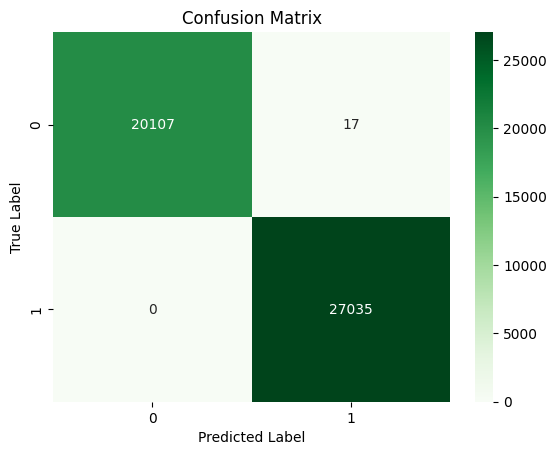

In [56]:
sns.heatmap(lr_cm,annot=True, fmt = 'd',cmap='Greens')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

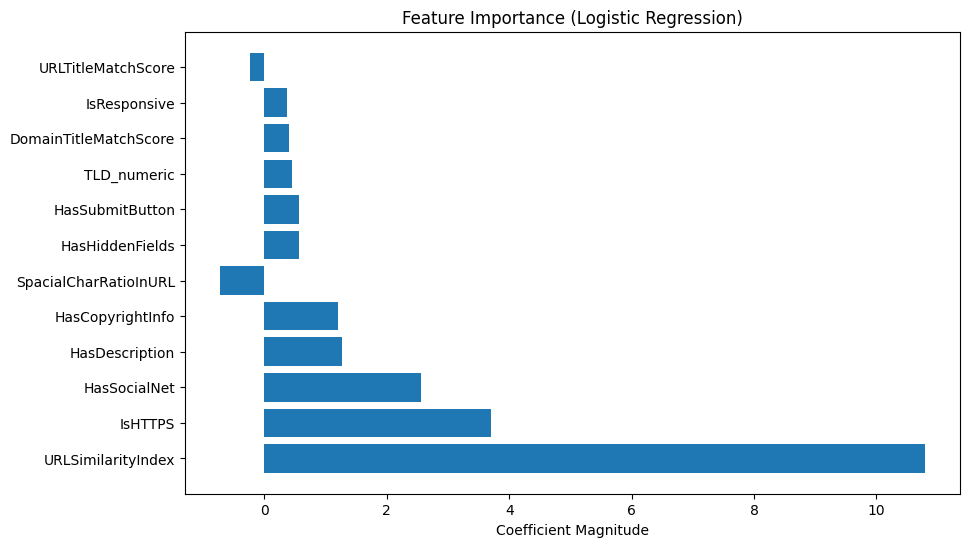

In [57]:
coefficients = lr_model.coef_[0]

# Get feature names (assuming X columns are named)
feature_names = X.columns

# Sort features by importance
indices = np.argsort(np.abs(coefficients))[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Logistic Regression)")
plt.barh(range(len(coefficients)), coefficients[indices], align="center")
plt.yticks(range(len(coefficients)), feature_names[indices])
plt.xlabel("Coefficient Magnitude")
plt.show()

Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [59]:
y_pred = rf_model.predict(X_test)
rf_cm = confusion_matrix(y_test, y_pred)
print(rf_cm)

[[20118     6]
 [    2 27033]]


In [60]:
rf_accuracy = accuracy_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred) #combines both precision and recall into a single value, providing a more balanced evaluation of a model's performance
rf_precision = precision_score(y_test, y_pred)

In [61]:
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1 Score: {rf_f1:.4f}")
print(f"Precision: {rf_precision:.4f}")

Accuracy: 0.9998
Recall: 0.9999
F1 Score: 0.9999
Precision: 0.9998


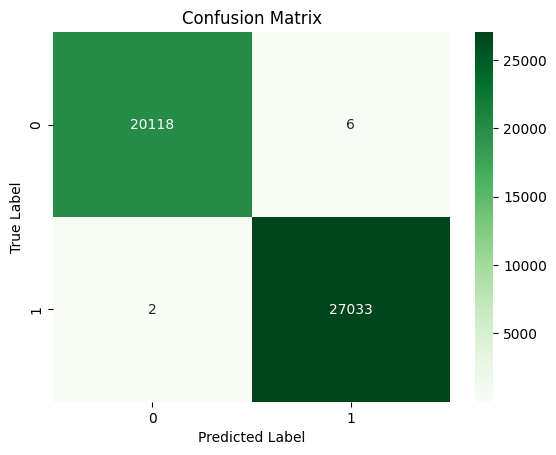

In [62]:
sns.heatmap(rf_cm,annot=True, fmt = 'd',cmap='Greens')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

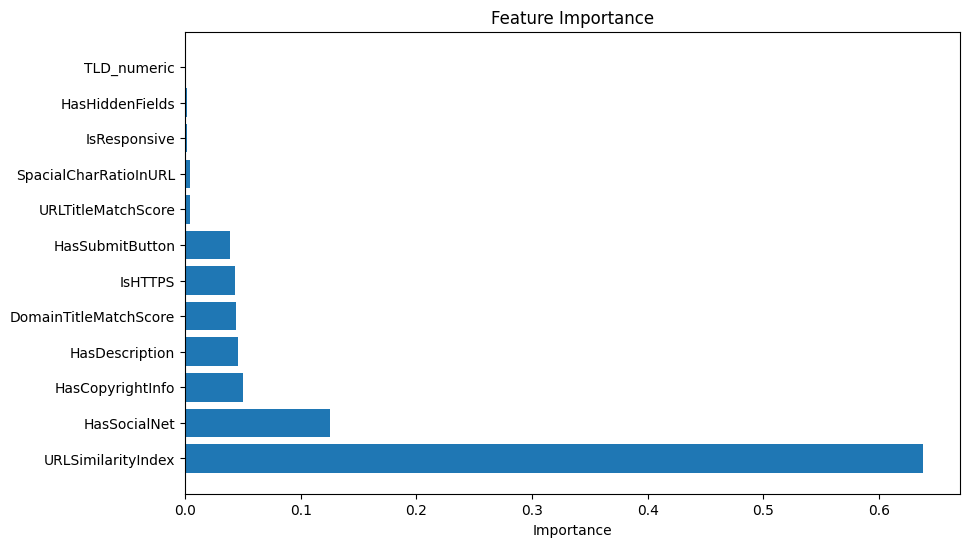

In [63]:
feature_importances = rf_model.feature_importances_

# Get feature names (assuming X columns are named)
feature_names = X.columns

# Sort features by importance
indices = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.barh(range(len(feature_importances)), feature_importances[indices], align="center")
plt.yticks(range(len(feature_importances)), feature_names[indices])
plt.xlabel("Importance")
plt.show()

# Comparison between Logistic Regression & Random Forest

In [67]:
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Recall', 'F1 Score', 'Precision'],
    'Logistic Regression': [lr_accuracy, lr_recall, lr_f1, lr_precision],
    'Random Forest': [rf_accuracy, rf_recall, rf_f1, rf_precision]
})

print("\nComparison Table:")
comparison_df


Comparison Table:


,Metric,Logistic Regression,Random Forest
0,Accuracy,0.999640,0.999830
1,Recall,1.000000,0.999926
2,F1 Score,0.999686,0.999852
3,Precision,0.999372,0.999778


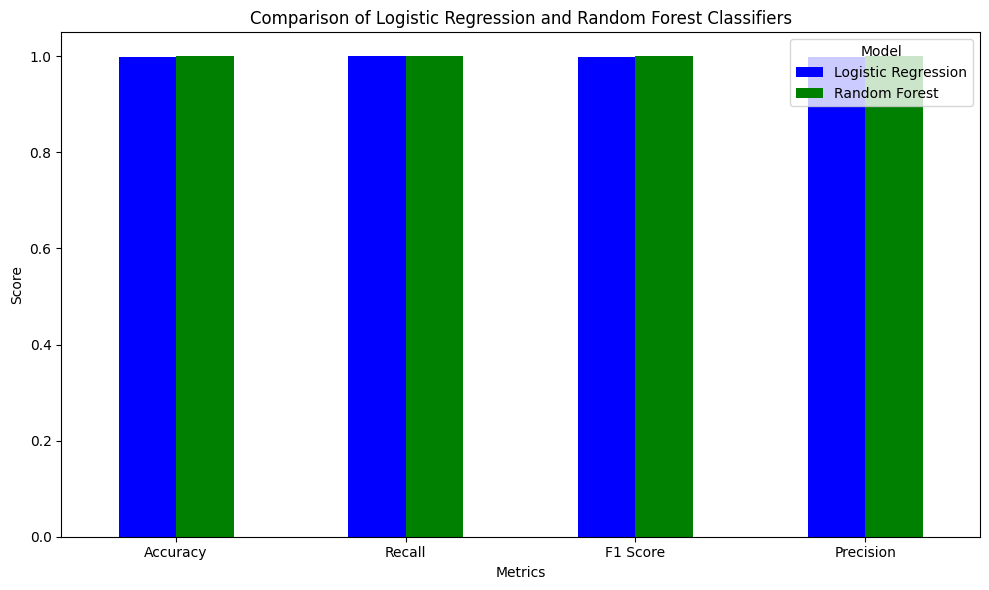

In [68]:
# Plotting the comparison
metrics = ['Accuracy', 'Recall', 'F1 Score', 'Precision']
log_reg_scores = [lr_accuracy, lr_recall, lr_f1, lr_precision]
rf_scores = [rf_accuracy, rf_recall, rf_f1, rf_precision]

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'Metric': metrics,
    'Logistic Regression': log_reg_scores,
    'Random Forest': rf_scores
})

# Plot
plot_df.set_index('Metric').plot(kind='bar', figsize=(10, 6), color=['blue', 'green'])
plt.title('Comparison of Logistic Regression and Random Forest Classifiers')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.xticks(rotation=0)
plt.legend(title='Model')
plt.tight_layout()
plt.show()

# Conclusion

In this project, we conducted a comprehensive data science and machine learning analysis of a Phishing Dataset. The goal was to explore, analyze, and build predictive models to differentiate between phishing and legitimate websites using various machine learning techniques. Below is a summary of key findings, insights, and conclusions from the analysis:

1. **Data Exploration and Preprocessing:**
We began by performing exploratory data analysis (EDA) on the dataset, which consisted of various features related to website attributes.

  The dataset contained both phishing and non-phishing (legitimate) labels. The initial step was to clean and preprocess the data, handling missing values and encoding categorical features to make the data suitable for machine learning models.

  We performed feature engineering, extracting relevant features from raw data and transforming them into formats that machine learning algorithms could effectively utilize.


2. **Data Distribution:**
After preprocessing, we observed the distribution of the target variable, label, which indicated whether a website was phishing (0) or legitimate (1). Visualizations like bar plots and pie charts were used to understand the balance between phishing and non-phishing URLs.
It was observed that the dataset contained a relatively balanced distribution of phishing and legitimate URLs, which is beneficial for training classification models, as imbalanced datasets can lead to biased results.


3. **Model Building:**
We experimented with several machine learning algorithms to predict the likelihood of a website being phishing or legitimate. The models tested included:

  Logistic Regression: A simple yet effective linear model for binary classification.

  Random Forest Classifier: An ensemble model that uses multiple decision trees to improve accuracy and reduce overfitting.

  The Logistic Regression model provided a baseline, while Random Forest and demonstrated higher predictive power due to their ability to capture complex relationships in the data.


4. **Model Evaluation:**
We evaluated the performance of each model using key metrics such as:

  Accuracy: The overall percentage of correctly classified instances.

  Precision: The ability of the model to correctly identify phishing URLs among all predicted phishing URLs.

 Recall: The ability of the model to identify all phishing URLs from the actual dataset.

 F1-Score: A balanced measure of both precision and recall, useful when dealing with imbalanced datasets.

  The Random Forest was slightly better than Logistic Regression, achieving higher accuracy, recall, and F1-scores. However, recall was especially important in this context, as detecting phishing websites (false negatives) is critical for user safety.

  A confusion matrix was generated to visualize the true positives, true negatives, false positives, and false negatives, which helped assess the model’s classification performance more clearly.


5. **Conclusion and Insights:**

  Phishing Detection Performance: The analysis showed that both Random Forest and logistic regression models were effective in distinguishing phishing websites from legitimate ones, with Random Forest slightly outperforming logistic regression.

  Feature Importance: Through model interpretation, we identified key features contributing to the classification of phishing websites, such as suspicious URL patterns, domain characteristics, and the presence of secure connections (HTTPS).

  Impact of Balanced Data: The dataset was relatively balanced, which contributed to better model performance. For future work, if the dataset were highly imbalanced, techniques like oversampling, undersampling, or synthetic data generation could be used to improve model accuracy.

  Practical Implications: This analysis demonstrates the effectiveness of machine learning algorithms in cybersecurity, specifically in detecting phishing websites. The developed models could be integrated into web browsers or security tools to help users avoid malicious websites.

# Future Work

**Model Improvement:** Future work could focus on fine-tuning hyperparameters to improve the performance of the models. Techniques like grid search or random search could be applied to optimize model parameters.

**Real-World Data:** The analysis was performed on a specific phishing dataset, and results may vary when applied to other datasets. Collecting and analyzing real-world, dynamic data could further improve model robustness and accuracy.

**Additional Features:** Incorporating more advanced features, such as textual content analysis of websites or domain registration information, might further enhance model performance.

**Final Thoughts:**
In summary, this analysis demonstrates the power of machine learning in solving real-world cybersecurity problems, such as phishing detection. By applying well-established algorithms like Random Forest and logistic regression, we were able to build robust models that can effectively classify phishing and legitimate websites, offering a useful tool in the ongoing fight against cybercrime.